### Pandas 

- Excel < Pandas < SQL

In [70]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

pd.__version__

'1.1.0'

In [11]:
%%writefile sun.txt
asdf
asdf

Overwriting sun.txt


In [12]:
f = open('sun.txt')

# dir(f) # __next__ 존재

In [16]:
data = pd.read_csv('a.csv', sep='|', encoding='utf8')

In [19]:
type(data)

pandas.core.frame.DataFrame

In [28]:
# data.values # pandas는 numpy 기반

# data.to_numpy() # numpy로 변환

'__array__' in dir(data) # __array__ 있으면 numpy 기반

True

In [34]:
'__iter__' in dir(data) # iterator로 사용 가능

True

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [115]:
import seaborn as sns

iris = sns.load_dataset('iris')

In [116]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### data type
- int64
- float64
- object
- category
    - 문자처럼 보이지만 수치형 데이터
- datetime64

In [44]:
# data.head(2)
# data.tail(2)
# data.sample(3) # random sample 보여주기

In [47]:
data['상권업종중분류명'].head(2)

0      유흥주점
1    커피점/카페
Name: 상권업종중분류명, dtype: object

In [48]:
data.상권업종중분류명.head(2)

0      유흥주점
1    커피점/카페
Name: 상권업종중분류명, dtype: object

In [49]:
data[['상권업종중분류명']].head(2)

,상권업종중분류명
0,유흥주점
1,커피점/카페


In [51]:
data['상권업종중분류명'].value_counts().head(2) # Series에서만 지원

한식         59725
이/미용/건강    44822
Name: 상권업종중분류명, dtype: int64

In [57]:
data['상가업소번호'].value_counts().head(2)

12591100    1
20030622    1
Name: 상가업소번호, dtype: int64

In [67]:
data['상권업종중분류명'].describe().head(2) # 다형성 => 데이터형에 따라 다른 값을 보여줌

count     573680
unique        94
Name: 상권업종중분류명, dtype: object

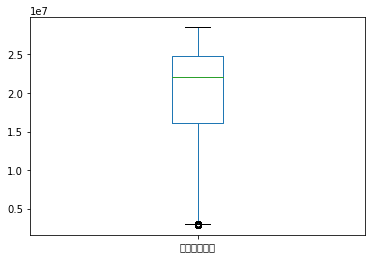

In [71]:
# data['상가업소번호'].describe().head(2)

data['상가업소번호'].plot.box()

#### Indexing

In [85]:
tips = sns.load_dataset("tips")

# iloc : index 기반 / numpy index 접근 방식과 동일
tips.iloc[3:5,:]

,total_bill,tip,sex,smoker,day,time,size
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [86]:
# loc : 이름으로 indexing
tips.loc[3:5, 'day':'size']

,day,time,size
3,Sun,Dinner,2
4,Sun,Dinner,4
5,Sun,Dinner,4


In [87]:
tips.at[3, 'size']

2

In [88]:
tips.iat[2,4]

'Sun'

In [91]:
# !pip install pandas-profiling

In [94]:
import pandas_profiling

In [96]:
pandas_profiling.ProfileReport(iris)

In [106]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


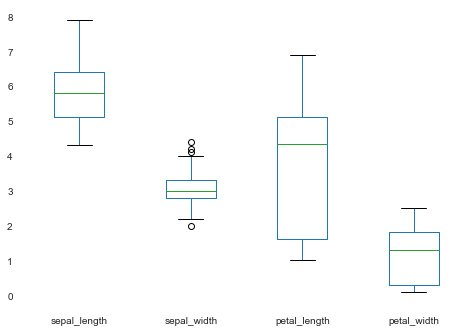

In [107]:
iris.plot.box()

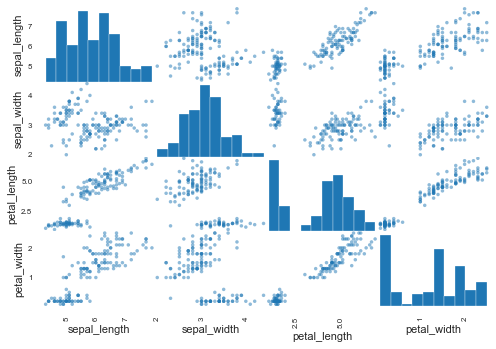

In [109]:
pd.plotting.scatter_matrix(iris);

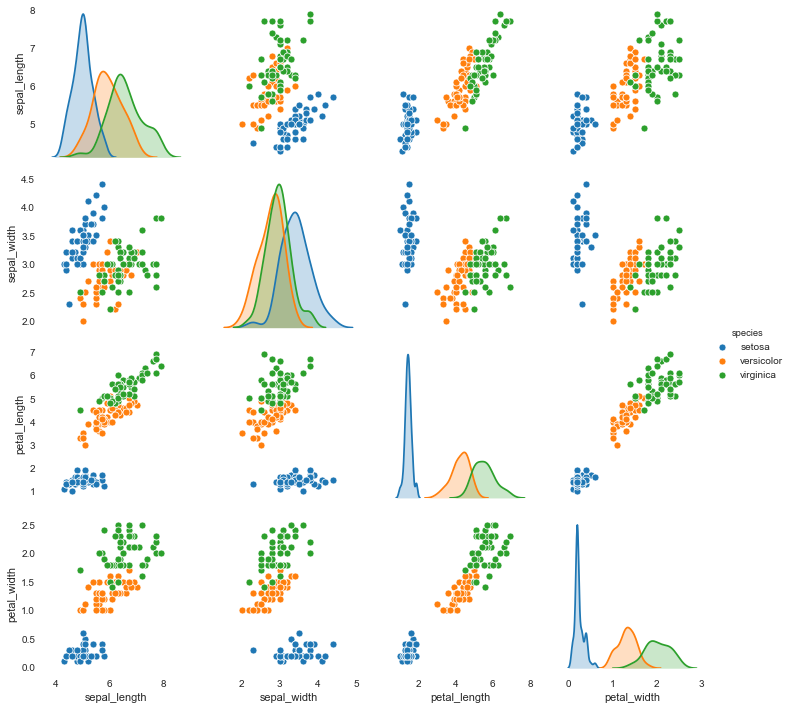

In [110]:
sns.pairplot(iris, hue = 'species')

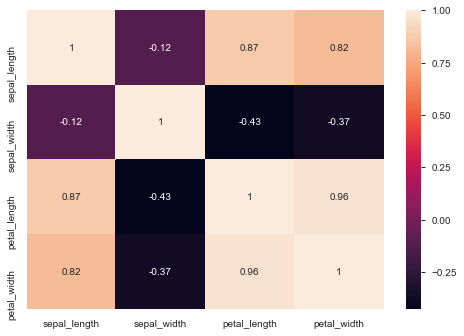

In [114]:
sns.heatmap(iris.corr(), annot= True)

In [120]:
tips.total_bill.map(lambda x : x+1) # Functional 방식

tips.sex.map({'Female' : 0, 'Male' : 1}) # Dictionary 방식

0      0
1      1
2      1
3      1
4      0
      ..
239    1
240    0
241    1
242    1
243    0
Name: sex, Length: 244, dtype: category
Categories (2, int64): [1, 0]

In [126]:
tips.select_dtypes(['float64', 'int64']) # 특정 dtype만 추출

tips.select_dtypes(['float64', 'int64']).applymap(lambda x : x+1) # applymap : dataframe에서만 적용 가능

,total_bill,tip,size
0,17.99,2.01,3
1,11.34,2.66,4
2,22.01,4.50,4
3,24.68,4.31,3
4,25.59,4.61,5
...,...,...,...
239,30.03,6.92,4
240,28.18,3.00,3
241,23.67,3.00,3
242,18.82,2.75,3


In [130]:
tips.tip.apply(lambda x : x+1) # Series에 가능

# tips.tip.apply({'Female' : 0, 'Male' : 1}) # Dictionary 사용 불가능 => Error

0      2.01
1      2.66
2      4.50
3      4.31
4      4.61
       ... 
239    6.92
240    3.00
241    3.00
242    2.75
243    4.00
Name: tip, Length: 244, dtype: float64

In [139]:
# for i, j in tips.iteritems(): # 열별로 iter
#     print(i, j)

# for i in tips.iterrows(): # 행별로 iter
#     print(i)

# for i in tips.itertuples():
#     print(i)

In [142]:
from collections import namedtuple

a = namedtuple('Pandas', ['Index', 'total_bill'])

In [151]:
b = a(0, 15)
b[0], b.Index

(0, 0)

In [155]:
tips.smoker.cat.codes # label incoding

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    0
241    0
242    1
243    1
Length: 244, dtype: int8

In [159]:
ss = tips.smoker.cat

ss.ordered # 순서가 있는지 check

False

In [162]:
ss = tips.smoker.str

ss.upper()

0       NO
1       NO
2       NO
3       NO
4       NO
      ... 
239     NO
240    YES
241    YES
242     NO
243     NO
Name: smoker, Length: 244, dtype: object

In [164]:
tips.rename({'size' : 'size_'}, axis = 1, inplace = True) # inplace : mutable처럼 변경 가능

In [165]:
tips.rename(columns={'sex' : 'gender'})

,total_bill,tip,gender,smoker,day,time,size_
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [182]:
# tips.drop([_ for _ in range(10)]) # 열 삭제
# tips.drop(columns='size_') # 행 삭제

In [188]:
iris[iris.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


#### Aggregate

In [199]:
# SAC : sort / split / apply / combined
# tips.groupby(['sex','day']).mean()

tips.groupby(['sex','day'], as_index=False).mean()

,sex,day,total_bill,tip,size_
0,Male,Thur,18.714667,2.980333,2.433333
1,Male,Fri,19.857000,2.693000,2.100000
2,Male,Sat,20.802542,3.083898,2.644068
3,Male,Sun,21.887241,3.220345,2.810345
4,Female,Thur,16.715312,2.575625,2.468750
5,Female,Fri,14.145556,2.781111,2.111111
6,Female,Sat,19.680357,2.801786,2.250000
7,Female,Sun,19.872222,3.367222,2.944444


In [219]:
tips.groupby('day').agg(['mean', 'max'])

total_bill              tip            size_    
           mean    max      mean    max      mean max
day                                                  
Thur  17.682742  43.11  2.771452   6.70  2.451613   6
Fri   17.151579  40.17  2.734737   4.73  2.105263   4
Sat   20.441379  50.81  2.993103  10.00  2.517241   5
Sun   21.410000  48.17  3.255132   6.50  2.842105   6

In [201]:
from itertools import groupby

list(groupby([1,1,2,2,3,3,3,3,3]))

[(1, <itertools._grouper at 0x1f446004cc0>),
 (2, <itertools._grouper at 0x1f446004898>),
 (3, <itertools._grouper at 0x1f446004048>)]

In [212]:
# tips.pivot_table(values = 'tip',index = 'sex', columns='day')

# tips.pivot_table(values = 'tip',index = 'sex', columns=['day', 'time']) 

tips.pivot_table(values = 'tip',index = 'sex', columns=['day', 'time'], 
                 margins=True, aggfunc = ['max', 'mean'])

max                                              mean         \
day     Thur          Fri           Sat    Sun   All      Thur          
time   Lunch Dinner Lunch Dinner Dinner Dinner           Lunch Dinner   
sex                                                                     
Male    6.70    NaN  2.20   4.73   10.0    6.5  10.0  2.980333    NaN   
Female  5.17    3.0  3.48   4.30    6.5    5.2   6.5  2.561935    3.0   
All     6.70    3.0  3.48   4.73   10.0    6.5  10.0  2.767705    3.0   

                                                          
day          Fri                 Sat       Sun       All  
time       Lunch    Dinner    Dinner    Dinner            
sex                                                       
Male    1.900000  3.032857  3.083898  3.220345  3.089618  
Female  2.745000  2.810000  2.801786  3.367222  2.833448  
All     2.382857  2.940000  2.993103  3.255132  2.998279

In [215]:
pd.crosstab(tips.sex, tips.day)

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


In [225]:
data = pd.read_csv('data/pew.txt', sep = '\t')

data.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [228]:
r = data.melt('religion', var_name = 'moon', value_name='sun')

r.head()

,religion,moon,sun
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


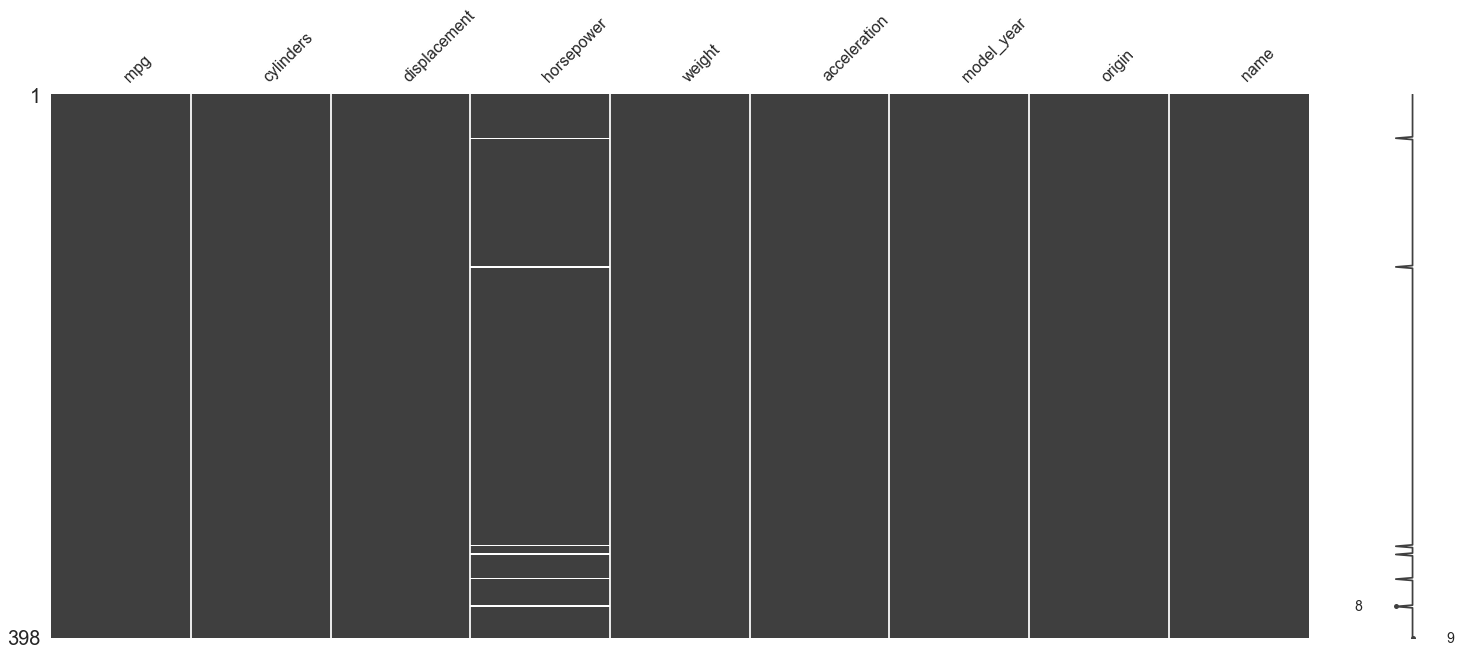

In [235]:
import missingno as mino
import seaborn as sns

# mino.matrix(r) # missing data check
mpg = sns.load_dataset('mpg')
mino.matrix(mpg)

In [246]:
data1 = pd.read_csv('data/billboard.csv', encoding='latin1')

In [251]:
data1.melt(data1.columns[:7]).dropna().head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,variable,value
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


In [262]:
data2 = pd.read_csv('data/weather.txt', sep='\t')

data2.melt(['id', 'year', 'month', 'element']).dropna()

,id,year,month,element,variable,value
20,MX000017004,2010,12,TMAX,d1,299.0
21,MX000017004,2010,12,TMIN,d1,138.0
24,MX000017004,2010,2,TMAX,d2,273.0
25,MX000017004,2010,2,TMIN,d2,144.0
40,MX000017004,2010,11,TMAX,d2,313.0
...,...,...,...,...,...,...
631,MX000017004,2010,8,TMIN,d29,153.0
638,MX000017004,2010,1,TMAX,d30,278.0
639,MX000017004,2010,1,TMIN,d30,145.0
674,MX000017004,2010,8,TMAX,d31,254.0


In [268]:
data3 = pd.read_csv('data/tb.csv')

data3.melt(data3.columns[:2]).dropna()

,iso2,year,variable,value
4,AD,1993,new_sp,15.0
5,AD,1994,new_sp,24.0
6,AD,1996,new_sp,8.0
7,AD,1997,new_sp,17.0
8,AD,1998,new_sp,1.0
...,...,...,...,...
120964,VU,2008,new_sp_fu,0.0
121038,YE,2008,new_sp_fu,0.0
121092,ZA,2008,new_sp_fu,0.0
121119,ZM,2008,new_sp_fu,0.0
